# Using networkx to create graphs
networkx: __[networkx.github.io](https://networkx.github.io/documentation/stable/index.html)__

answer from stackoverflow: __[stackoverflow.com/a/14244306/5172579](https://stackoverflow.com/a/14244306/5172579)__

In [1]:
import networkx as nx
import re
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw = Path('requirements.ini').read_text()

In [3]:
regex = re.compile(r'^([A-Z]+)::Requires\s+=\s([A-Z"]+)$')

In [4]:
G = nx.DiGraph()
roots = set()
for l in raw.splitlines():
    if len(l):
        target, prereq = regex.match(l).groups()
        if prereq == '""':
            roots.add(target)
        else:
            G.add_edge(prereq, target)

In [5]:
for s in roots:
    print(s)
    spacer = {s: 0}
    for prereq, target in nx.dfs_edges(G, s):
        spacer[target] = spacer[prereq] + 2
        print('{spacer}+-{t}'.format(
                                     spacer=' ' * spacer[prereq],
                                     t=target))
    print()

A
+-B
  +-C
+-H

AA
+-BB
  +-CC



In [6]:
nx.convert.to_dict_of_dicts(G)

{'A': {'B': {}, 'H': {}},
 'B': {'C': {}},
 'C': {},
 'H': {},
 'AA': {'BB': {}},
 'BB': {'CC': {}},
 'CC': {}}

In [7]:
nx.convert.to_dict_of_lists(G)

{'A': ['B', 'H'],
 'B': ['C'],
 'C': [],
 'H': [],
 'AA': ['BB'],
 'BB': ['CC'],
 'CC': []}

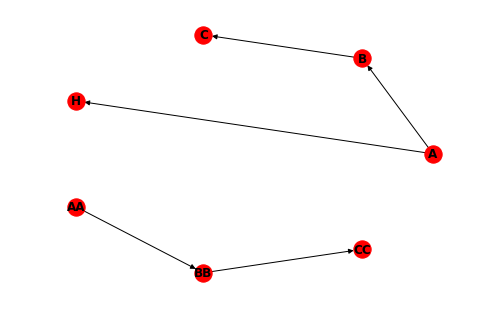

In [8]:
g = nx.draw_circular(G, with_labels=True, font_weight='bold')